# **DEPENDENCIES**

In [1]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from optihive import pso as ohp
from optihive import utils as ohu

# **PARTICLE SWARM OPTIMIZATION**

## **VanillaSwarm**

**Objective Function**

In [2]:
# Objectivefunction will be given a dictionary of parameters, with the keys
# being the parameter names and the values being the parameter values. 'f' here
# is a dummy that directly acts on x and y
f = lambda x, y: (x-3.14)**2 + (y-2.72)**2 + np.sin(3*x+1.41) + np.sin(4*y-1.73)

# 'of' however acts on the expected dictionary by unpacking it.
of = lambda kwargs: f(**kwargs)
print(f"of(1, 2) = {of({'x': 1, 'y': 2})}")

of(1, 2) = 4.130187303206262


**Objective Function Contour**

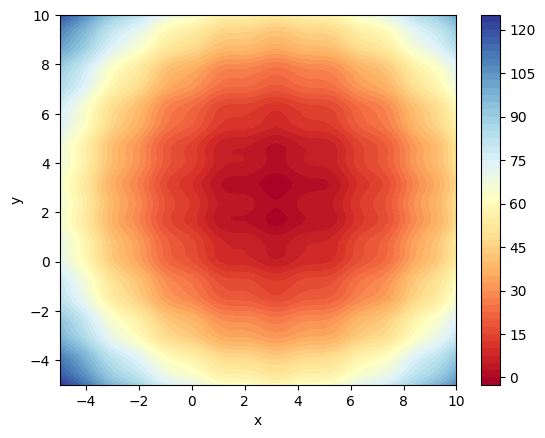

In [3]:
# This is a plot of the objective function on regular grid data, the plot 
# methods in trackers will usually work on irregular data logged while updating
# the swarm particles' location and the local scores using some form of
# interpolation backend, they are meant to only give a brief idea of the loss
# space
def plot_of_contour(of, x_range, y_range, levs=100, xlabel="x", ylabel="y"):
    x = np.linspace(*x_range, levs)
    y = np.linspace(*y_range, levs)
    X, Y = np.meshgrid(x, y)
    Z = of({'x': X, 'y': Y})
    cf = plt.contourf(X, Y, Z, 50, cmap='RdYlBu')
    plt.colorbar(cf)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

plot_of_contour(of, (-5, 10), (-5, 10))

**Parameter Initialization**

In [4]:
# Defining the search space, the keys are the parameter names and the values
# are tuples of the form (type, domain), where type is either 'con' for 
# continuous 'cat' for categorical, 'dis' for discrete of any type or 'dis_int'
# for discrete of integer type.
search_space_con = {
    "x": ("con", [-5, 10]),
    "y": ("con", [-5, 10])
}

# discrete search space for the same objective function, while internally, the
# space is continuous, the objective function is being evaluated at the closest
# discrete point to the current particle location in the domain.
search_space_dis = {
    "x": ("dis", list(range(-5, 10))),
    "y": ("dis", list(range(-5, 10)))
}

n_particles = 100

sot_con = ohp.SwarmObjectiveTracker(
    track_params=["x", "y"],
    eager=False,
    lazy_step=4,
)

sot_dis = ohp.SwarmObjectiveTracker(
    track_params=["x", "y"],
    eager=False,
    lazy_step=4,
)

**Swarm Initialization**

In [5]:
swarm_con = ohp.VanillaSwarm(
    search_space=search_space_con,
    n_particles=n_particles,
    objective_function=of,
    trackers=[sot_con],
)

swarm_dis = ohp.VanillaSwarm(
    search_space=search_space_dis,
    n_particles=n_particles,
    objective_function=of,
    trackers=[sot_dis],
)

print(">> Initial Values")
print(f"swarm_con | G: {swarm_con.G}, Gs: {swarm_con.Gs}")
print(f"swarm_dis | G: {swarm_dis.G}, Gs: {swarm_dis.Gs}")

swarm_con.run(200)
swarm_dis.run(200)

print(">> Final Values")
print(f"swarm_con | G: {swarm_con.G}, Gs: {swarm_con.Gs}")
print(f"swarm_dis | G: {swarm_dis.G}, Gs: {swarm_dis.Gs}")

>> Initial Values
swarm_con | G: [[3.3987596 1.6678923]], Gs: -0.6192100747570021
swarm_dis | G: [[4. 3.]], Gs: 0.816942222151282
>> Final Values
swarm_con | G: [[3.185155  3.1298027]], Gs: -1.8083520359212573
swarm_dis | G: [[3.463438  3.4887593]], Gs: -1.483513295303561


As it can be seen, the swarm with continuous domain in the same range as the
swarm with discrete domain, performs better. This is because the objective
function is being calculated at the current points, while in discrete domain, 
the objective function is calculated at the nearest point to the current point.


**Visualization**

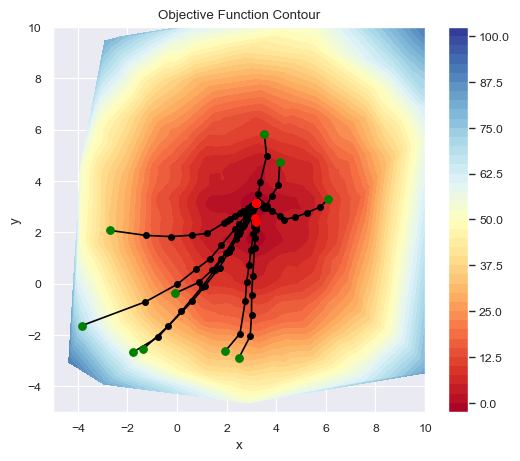

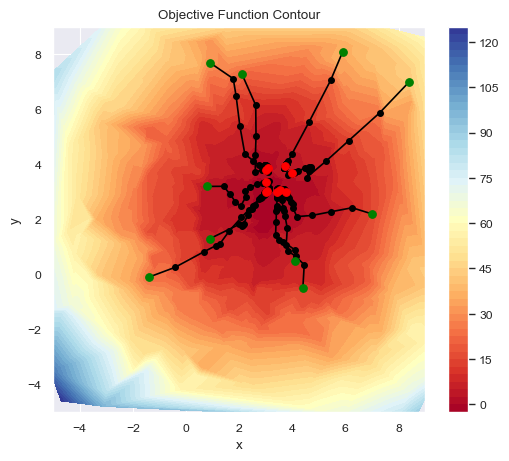

In [6]:
# Visualizing the loss space via the swarm objective trackers draw_lazy method.
# The contours made are approximated from the logged positional data of the
# swarm particles, the particle_indices argument is used to select a subset of
# particles to be plotted.
sot_con.draw_lazy(particle_indices=[p for p in range(0, n_particles, 10)])
sot_dis.draw_lazy(particle_indices=[p for p in range(0, n_particles, 10)])

It can be seen that discrete domain's loss interpolation is not as good as that of continuous. This is because of the reason previously mentioned, loss is calculated at the nearest valid point in the domain, not the internal continuous domain.

**Gradient Assist**

>> Initial Values
swarm_con | G: [[3.7396955 3.2470071]], Gs: -0.26570993580398394
swarm_dis | G: [[3. 3.]], Gs: -1.483513295303561
>> Final Values
swarm_con | G: [[3.185155  3.1298032]], Gs: -1.808352035920281
swarm_dis | G: [[3. 3.]], Gs: -1.483513295303561


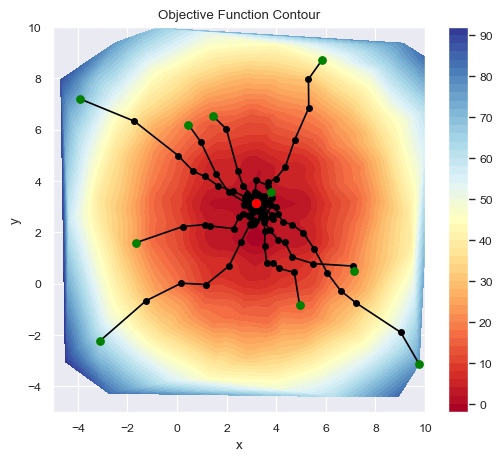

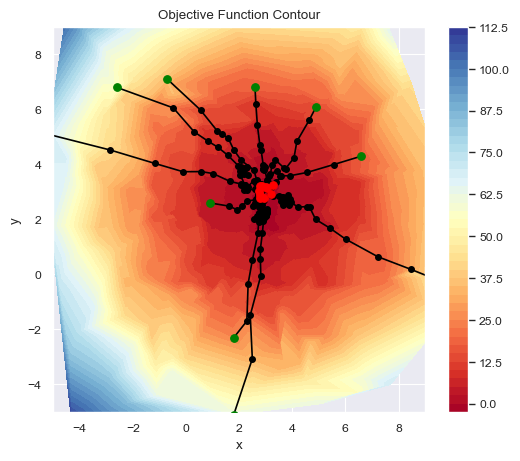

In [7]:
search_space_con = {
    "x": ("con", [-5, 10]),
    "y": ("con", [-5, 10])
}

search_space_dis = {
    "x": ("dis", list(range(-5, 10))),
    "y": ("dis", list(range(-5, 10)))
}

n_particles = 100

sot_con = ohp.SwarmObjectiveTracker(
    track_params=["x", "y"],
    eager=False,
    lazy_step=4,
)

sot_dis = ohp.SwarmObjectiveTracker(
    track_params=["x", "y"],
    eager=False,
    lazy_step=4,
)

swarm_con = ohp.VanillaSwarm(
    search_space=search_space_con,
    n_particles=n_particles,
    objective_function=of,
    trackers=[sot_con],
    use_gradient=True,
    r3=0.4,
    gw=0.3,
)

swarm_dis = ohp.VanillaSwarm(
    search_space=search_space_dis,
    n_particles=n_particles,
    objective_function=of,
    trackers=[sot_dis],
    use_gradient=True,
    r3=0.4,
    gw=0.3,
)

print(">> Initial Values")
print(f"swarm_con | G: {swarm_con.G}, Gs: {swarm_con.Gs}")
print(f"swarm_dis | G: {swarm_dis.G}, Gs: {swarm_dis.Gs}")

swarm_con.run(200)
swarm_dis.run(200)

print(">> Final Values")
print(f"swarm_con | G: {swarm_con.G}, Gs: {swarm_con.Gs}")
print(f"swarm_dis | G: {swarm_dis.G}, Gs: {swarm_dis.Gs}")

sot_con.draw_lazy(particle_indices=[p for p in range(0, n_particles, 10)])
sot_dis.draw_lazy(particle_indices=[p for p in range(0, n_particles, 10)])

As it can be seen, gradient assist helps increase the performance in terms of loss space construction, the confirmity of final positions and the apparent increase in cognitive effects.

**Random Forest Classifier hyperparameter tuning**

In [2]:
from sklearn.datasets import load_iris

In [3]:
search_space_rfc = {
    "n_estimators": ("dis_int", list(range(1, 50))),
    "max_depth": ("dis_int", list(range(1, 15))),
    "min_samples_split": ("dis_int", list(range(2, 15))),
    "min_samples_leaf": ("dis_int", list(range(1, 15))),
    "max_features": ("cat", ["sqrt", "log2"]),
    "criterion": ("cat", ["gini", "entropy"]),
    "min_weight_fraction_leaf": ("con", [0.0, 0.5]),
}
n_particles = 50

X, Y = load_iris(return_X_y=True)
rfcof = ohu.RandomForestClassifierObjective(X, Y)

sot_rfc = ohp.SwarmObjectiveTracker(
    track_params=["n_estimators", "min_weight_fraction_leaf"],
    eager=False,
    lazy_step=4,
)
pbt_rfc = ohu.ProgressBarTracker()

In [4]:
swarm_rfc = ohp.VanillaSwarm(
    search_space=search_space_rfc,
    n_particles=n_particles,
    objective_function=rfcof,
    trackers=[sot_rfc, pbt_rfc],
)

print(">> Initial Values")
Gi = swarm_rfc.x_to_dict(swarm_rfc.X_parse(swarm_rfc.G)[0])
print(f"swarm_rfc | G: {Gi}, Gs: {swarm_rfc.Gs}")

swarm_rfc.run(100)

>> Initial Values
swarm_rfc | G: {'n_estimators': 36, 'max_depth': 4, 'min_samples_split': 10, 'min_samples_leaf': 11, 'max_features': 'sqrt', 'criterion': 'entropy', 'min_weight_fraction_leaf': 0.06297623366117477}, Gs: 0.0


100%|██████████| 100/100 [03:34<00:00,  2.08s/it]

In [5]:
print(">> Final Values")
Gf = swarm_rfc.x_to_dict(swarm_rfc.X_parse(swarm_rfc.G)[0])
print(f"swarm_rfc | G: {Gf}, Gs: {swarm_rfc.Gs}")

>> Final Values
swarm_rfc | G: {'n_estimators': 36, 'max_depth': 4, 'min_samples_split': 10, 'min_samples_leaf': 11, 'max_features': 'sqrt', 'criterion': 'entropy', 'min_weight_fraction_leaf': 0.06297623366117477}, Gs: 0.0


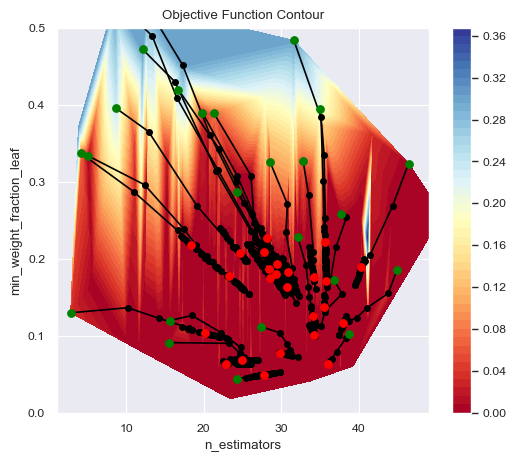

In [6]:
sot_rfc.draw_lazy(particle_indices=[p for p in range(0, n_particles, 2)])